<h1>Pima Indians Diabetes Dataset Analysis</h1>

This notebook is focued on analysis of Diabetes dataset from India

<h2>Importing the dataset and libraries</h2>

In [68]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd

In [69]:
print(os.listdir('/kaggle/input/pima-indians-diabetes-database'))

['diabetes.csv']


<h3>Creating functions for plotting graph</h3>

<h3>Distribution graph/histogram function</h3>

In [70]:
def plotperColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)

    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else: 
            columnDf.hist()
            
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
        
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

<h3>Corrlation matrix function</h3>

In [80]:
def plotCorrelationMatrix(df, graphWidth):
    filename = getattr(df, 'dataframeName', 'Dataset')
    
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns') 
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: Not enough numeric columns in {filename}.')
        return
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = ax.matshow(corr, cmap='coolwarm')
    
    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticks(range(len(corr.columns)))
    ax.set_yticklabels(corr.columns)
    
    ax.xaxis.set_ticks_position('bottom')
    
    fig.colorbar(corrMat, ax=ax)
    
    plt.title(f'Correlation Matrix for {filename}', fontsize=15, pad=20)
    plt.show()

<h3>Scatter plot and density plot functions</h3>

In [78]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
   
    df = df.dropna(axis='columns') 
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]

    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate(
            'Corr. coef = %.3f' % corrs[i, j], 
            (0.5, 0.9), 
            xycoords='axes fraction', 
            ha='center', 
            va='center', 
            size=textSize
        )
        
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<h2>Information fo the dataset</h2>

In [73]:
nRowsRead= 1000
df1= pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv', delimiter= ',',nrows=nRowsRead)
df1.dataframeName = 'diabetes.csv'
nRow, nCol= df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 768 rows and 9 columns


In [74]:
df1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>Plot per columns distribution graph</h2>

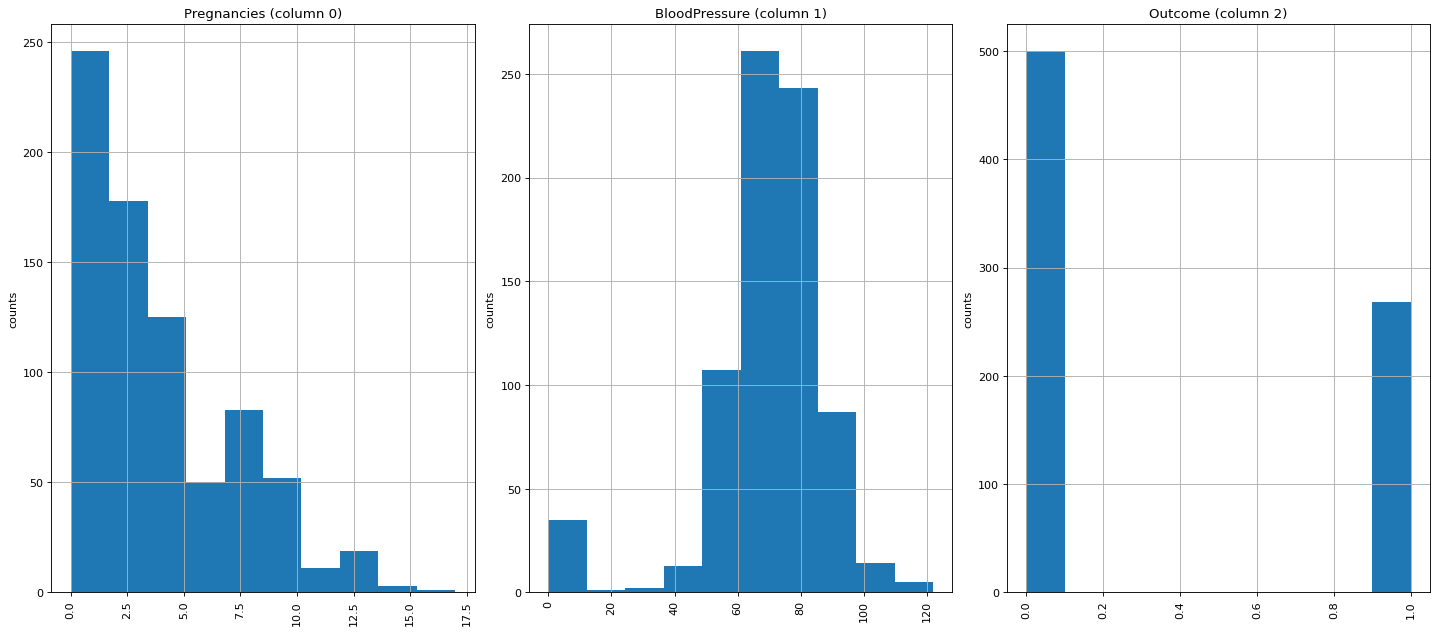

In [75]:
plotperColumnDistribution(df1,10,5)

<h2>Graph of correlation matrix<h2>

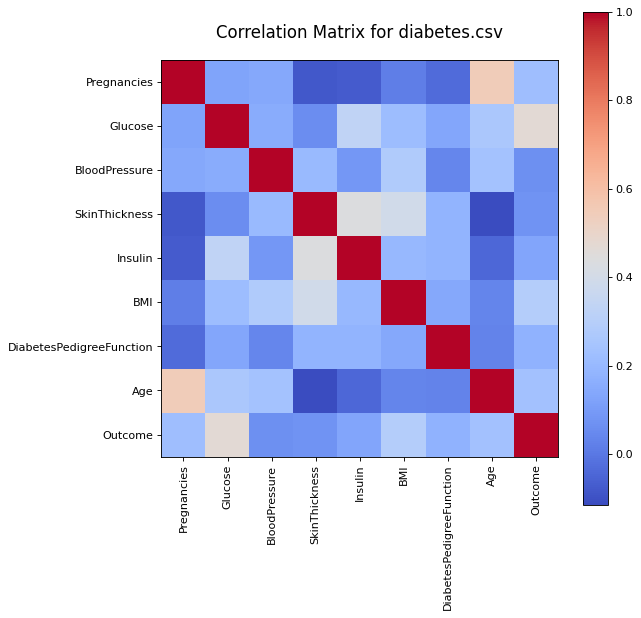

In [76]:
plotCorrelationMatrix(df1, 8)

The above is visualization of correlation of features with each other 

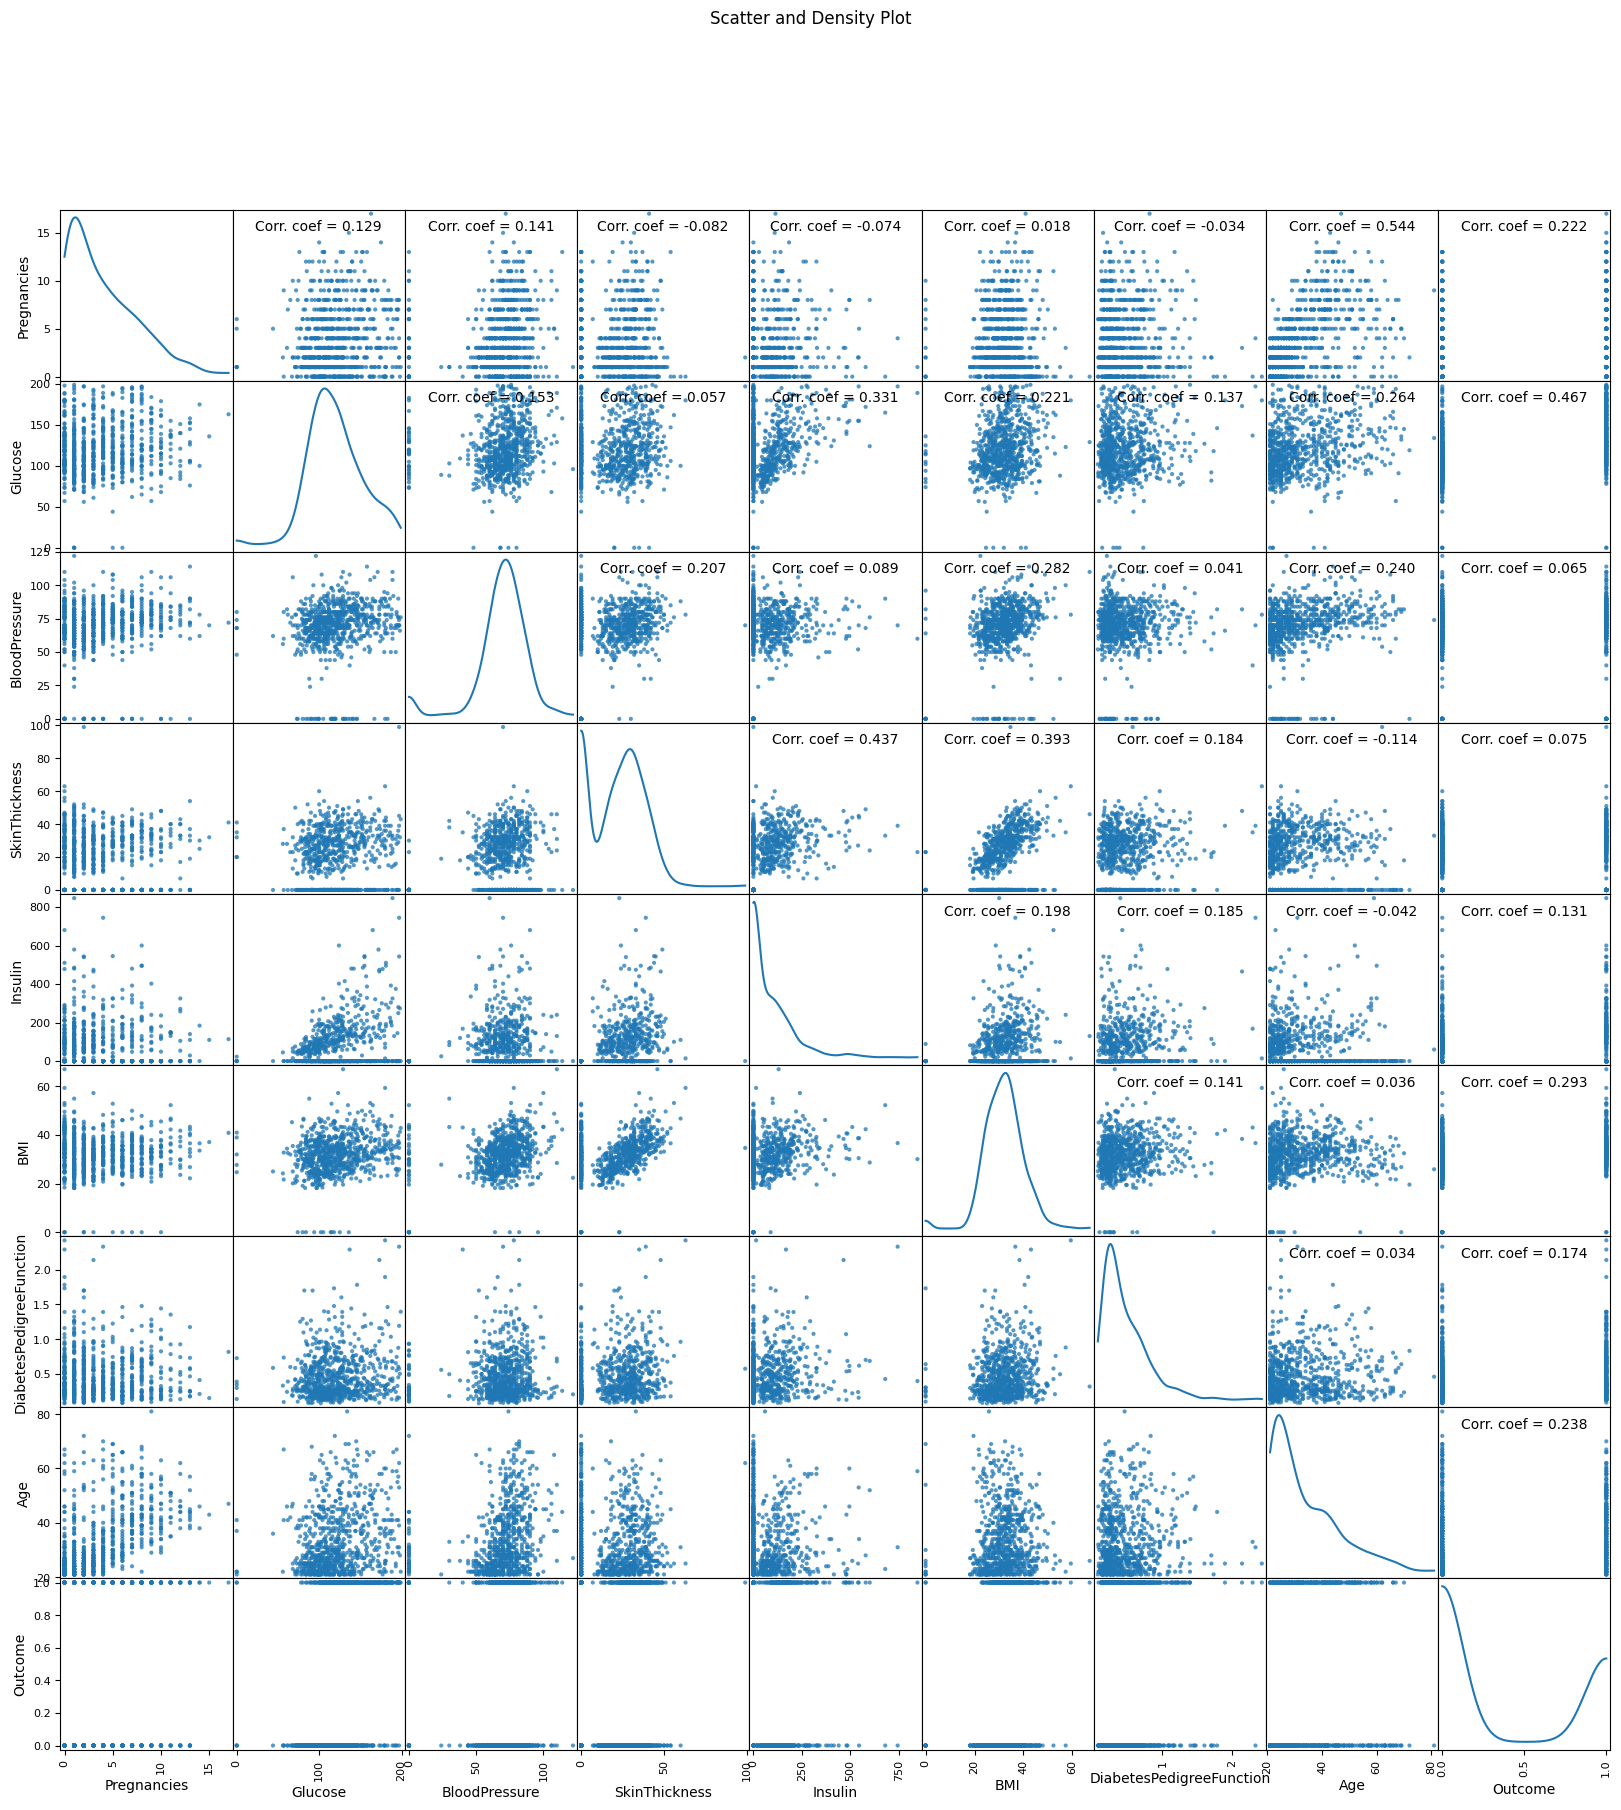

In [79]:
plotScatterMatrix(df1, 20, 10)

We can see the correlation of every propperty with each other

<h1>===Here we conclude our analysis===</h1>